In [245]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

data=pd.read_csv('data.csv', index_col=0)

Saumya Sharma (ss2944), Naina Pai (np288), Alexandra Barry (anb67), Thomas Neumeyer (tjn46)

# Introduction
## Abstract
In the following report, we will attempt to identify whether a relationship exists between the U.S. economy  and the performance of the North American movie industry. Specifically, we will looked at the following questions:
* How does the economy affect the overall number of tickets sold?
* How does the economy affect the performance of different genres? 

Through a wide array of analysis, we have determined that the relationship between the economy and the total number of tickets sold does not exist. However, when taking a closer look at the relationship between economic performance and the market share that each genre captures, we found that as the economy performs well more people turn to Drama movies, and if the economy performs poorly, then more people will turn to Adventure movies.
## Background
The box-office movie industry has had a long and tight relationship with the United States. Data on box-office movies first began when Variety magazine recorded the performance of movies in the U.S. based on the number of tickets sold (http://www.archive.org/stream/variety66-1922-03#page/n46/mode/1up). Even now, the success of the movie industry is highly dependent on the U.S., with American movies ranking as the top 6 popular movies worldwide in 2020 (https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/released-in-2020). The U.S. and the box-office movie industry are undoubtedly intertwined. However, the U.S. economy is becoming increasingly volatile, with four economic downturns in the past three decades. This begs the question, how strongly does the U.S. economy impact the performance of the movie industry? In the following report, we will be analyzing whether the U.S. economy drives ticket sales and movie preferences in the North American box-office movie market because as the U.S. market becomes more volatile, the box-office industry may have to design its business strategy in response to larger economic trends.

## Composition
### Dataset Overview

To identify whether a relationship exists between the U.S. economy and the box office movie industry, we have compiled a dataset that contains the following information:
* *Attributes:* Total box office tickets sold in North America, market share based on genre in North America, annual % change in U.S. GDP, and change in annual % change of national U.S. income in chained dollars
* *Observations:* The data spans the years 1995-2018

In [246]:
data.head()

,Adventure Market Share,Action Market Share,Drama Market Share,Comedy Market Share,Thriller-or-Suspense Market Share,Horror Market Share,Romantic-Comedy Market Share,Musical Market Share,Other Genres Market Share,Total Tickets,GDP % Growth,"% Income Annual Change, Chained Dollars"
1995,0.145,0.197,0.287,0.197,0.0621,0.0278,0.0559,0.0000,0.0282,1221689691,2.6843,3.3
1996,0.223,0.211,0.234,0.180,0.0531,0.0195,0.0740,0.0004,0.0050,1305169274,3.7725,3.2
1997,0.138,0.229,0.188,0.204,0.1010,0.0641,0.0467,0.0179,0.0113,1385218935,4.4472,3.7
1998,0.238,0.143,0.232,0.116,0.1160,0.0470,0.0739,0.0099,0.0242,1443827003,4.4814,5.9
1999,0.219,0.124,0.199,0.184,0.0783,0.0650,0.0984,0.0032,0.0291,1444664086,4.7532,3.3


This data is not designed to represent a larger population or to be extrapolated geographically. We are specifically looking at how the performance of the U.S. market impacts the performance of the North American box-office movie industry.

### Dataset Sources

This dataset has two key components: movie information and economic information.

Movie information was scraped from the Numbers, a data analytics organization with the following mission: 'The Numbers was officially launched on October 17th, 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies.' The data collection was funded by Nash Information Services, a movie industry consulting service.

Economic data from the U.S. Bureau of Economic Analysis (BEA) in the form of a csv. The government keeps track major economic indicators to aid them in making economic decisions. This data was funded by the U.S. government.

People were not involved in any of the data collection.

### Data Preparation and Preprocessing

`Total Tickets` was recorded by ticket sale transactions. Market share by genre was found by first sorting movies into eleven genres. From there, the number of tickets sold for movies were summed under the genre in which they fall and under the year in which the transaction occurred. Each genre was divided by the number of tickets sold that year to get a market share percentage. Government data was collected and analyzed by the BEA.

We processed the data in the following manner:
* Segmenting economic data for the 1995-2018 time period because of the Numbers data limitation
* Creating an "Other" genre category for genres with a market share of <1% (i.e.: Westerns)

## Potential Influences on the Data
* Illegal movie streaming detracts from movies sold. Therefore, a genre could be more popular, but many people watched it illegally and would not have been tallied.
* A movie could fall under two categories, but was placed under one for simplification. This may cause a skew in favor of one genre over another.

# Overviewing the Data

In [247]:
col = data.columns[:len(data.columns)-3]
incomelabel = data.columns[-1]
gdplabel =data.columns[-2]
headings=data.columns[:]
summary = data.describe()
ticketslabel=data.columns[-3]

## Total Tickets Sold Data

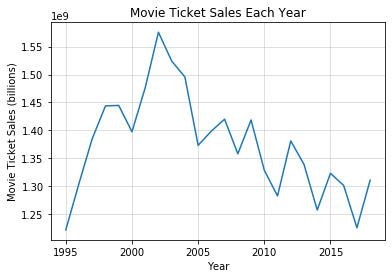

In [248]:
plt.plot(data[ticketslabel])
plt.xlabel("Year")
plt.ylabel('Movie Ticket Sales (billions)')
plt.title('Movie Ticket Sales Each Year')
plt.grid(alpha=.5)
plt.show()

We will be measuring the overall success of the box-office industry by measuring the number of tickets sold. From the graph above, we can make some general observations:
* Popularity peaked at in 2003
* Popularity has slowly declined since
* Short-term pattern of peaking and dropping every three years

## Movie Genre Market Share Data

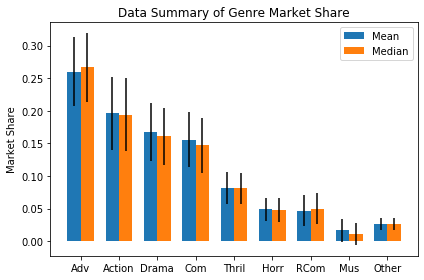

In [249]:
stats = pd.DataFrame()
for c in col:
    stats[c]=[summary[c][5],summary[c][1],summary[c][2]]
stats.index = ['Med','Mean', 'StDev']


means =tuple(stats.loc['Mean'])
stdev = tuple(stats.loc['StDev'])
med = tuple(stats.loc['Med'])
ind = np.arange(len(col))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, means,  width, yerr=stdev, label='Mean')
rects2 = ax.bar(ind + width/2, med, width, yerr=stdev, label='Median')
ax.set_ylabel('Market Share')
ax.set_title('Data Summary of Genre Market Share')
ax.set_xticks(ind)
ax.set_xticklabels(['Adv', 'Action', 'Drama','Com', 'Thril', 'Horr', 'RCom','Mus', 'Other'])
ax.legend()

fig.tight_layout()
plt.show()

Through this bar chart, we can get note some general characteristics of the data:
* In all genres, mean and median are close, demonstrating a limited impact of outliers
* The top four genres capture about 80% of the market, so correlations are likelier to exist in one of those genres

## Economic Indicators Data

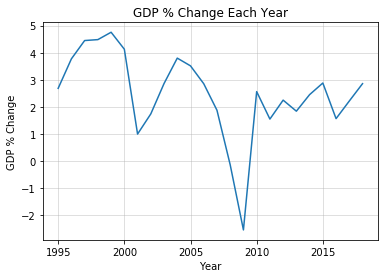

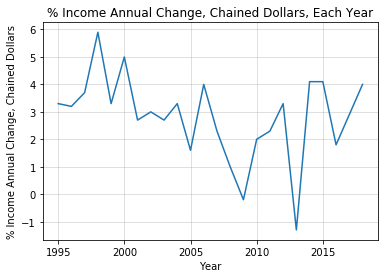

In [250]:
linegraphs = [gdplabel, incomelabel]
yticklabels=['GDP % Change',incomelabel]
titlelabels=['GDP % Change Each Year',incomelabel + ', Each Year']
for i in range(len(linegraphs)):
    plt.plot(data[linegraphs[i]])
    plt.xlabel("Year")
    plt.ylabel(yticklabels[i])
    plt.title(titlelabels[i])
    plt.grid(alpha=.5)
    plt.show()

### GDP % Change Each Year

This graph will be used as an economic indicator to measure the performance of the economy. We chose to use annual percentage change in GDP because it is more revealing than GDP
* GDP generally increases, so an increase in GDP is not revealing
* If the rate at which the GDP increases decreases, this indicates that the economy is not performing well

This seems like a viable way of measuring economic performance because when the value drops, it corresponds with a recession, while when the value increases, it responds with improvements in the economy. 
* 2001: GDP % change declines because of a recession (https://en.wikipedia.org/wiki/Recession_2000s) 
* 2008: GDP % change plummets during the Great Recession
* After 2008: GDP % change is approximately 2%, consistent with the growth and stability that the economy has witnessed

### % Income Annual Change, Chained Dollars, Each Year

This graph will also be used to evaluate the performance of the economy, but measures the direct impact on consumers by showing variations in income. We chose to use the change in annual percent change in income for reasons similar to that of using GDP % change. 
* Change is impacted by a variety of factors and has too much noise
* Annual change in income will generally be positive
* A rate of change is less than the year before  reveals that consumers have less relative income and that the economy is not performing as well
* "Chained dollars" accounts for inflation

This seems like a good way of measuring the economy because it reveals a lot of information about the economy.
* We see the drop in 2008
* Steady decline in % income annual change from 1998 to 2008, because "Americans earned a smaller average income in 2005 than in 2000."(https://www.nytimes.com/2007/08/21/business/21tax.html)

However, this data does have some shortcomings because it shows a total change in income and not a demographic specific change. Therefore, data like the drop in the economy in 2013 was due to the top 1% of Americans  making significantly less that year and not because Americans as a whole made less money (https://www.census.gov/library/publications/2014/demo/p60-249.html). 

# Analyzing the Data

## Overview

Now that we have seen an overview of the data, we can take a look at the relationship between the movie industry and the economy. Specifically, we will be analyzing the following relationships, where the first variable represents an economic indicator, while the second variable represents a measurement of the economy:
* GDP impact on number of tickets sold
* Income impact on number of tickets sold
* GDP impact on genre market share
* Income impact on genre market share

## Analysis Procedure

To establish whether a relationship exists, each dataset will be analyzed through the following procedure:
* **Applying a linear model through a scatter plot and a line of best fit** to see general data trends
* **Finding coefficient of determination (r)** to quantify the strength and direction of a linear relationship
* **Testing randomness**, if we identify a linear relationship, to see if it is due to chance
* **Spearman Correlation** to see if a non-linear relationship exists, and if it does, whether it is due to chance

# How does the economy impact the number of tickets sold?
In this section, we will be looking at how the number of box-office movie tickets sold is impacted by the performance of the economy. We will be using `GDP % Growth` and `% Income Annual Change, Chained Dollars` as economic indicators to measure the state of the economy.

**Hypothesis:** Change in `GDP % Growth`/`% Income Annual Change, Chained Dollars` will change `Total Tickets`.

This would be a logical conclusion because movie theater tickets will likely be an inferior good or a normal good. According to economic theory, if box-office movie tickets are an inferior good, then a decrease in income will cause an increase in movie tickets sold, and if they are considered a normal good, an increase in income will cause an increase in movie tickets sold.

**Null-Hypothesis:** Change in `GDP % Growth`/`% Income Annual Change, Chained Dollars` will *not* change `Total Tickets`.

## How does percent change in GDP impact the number of box-office movie tickets sold?
First, we will be using percentage change in GDP as a measure of the health of the U.S. economy and identifying whether it impacts the number of box-office movie tickets sold. 

### Identifying Whether a Linear Relationship Exists
#### Applying a Linear Model

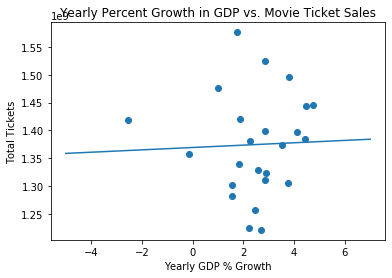

In [251]:
model = LinearRegression().fit(data[[gdplabel]], data[[ticketslabel]])

score = model.coef_[0]
intercept=model.intercept_[0]
x = np.linspace(-5,7,100)
y = score*x+intercept
plt.plot(x, y)

plt.scatter(data[[gdplabel]], data[ticketslabel])
plt.ylabel(ticketslabel)
plt.xlabel("Yearly GDP % Growth")
plt.title("Yearly Percent Growth in GDP vs. Movie Ticket Sales")
plt.show()

From the visual above, we notice: 
* Scatter plot points are relatively vertical at 2%
* Secondly, we can see that the line is relatively flat

It is unlikely that there is a relationship between the two variables. Had there been an actual relationship, then the `GDP % Growth` of approximately -2.5% would have had a `Total Tickets` value significantly lower or higher than the data that lies around 2%.

#### Finding r

In [252]:
r= np.corrcoef(data[gdplabel], data[ticketslabel])[0][1]
print("R Value of Correlation: ", r)

R Value of Correlation:  0.03697662981131512


This r-value is extremely low. Therefore, `GDP % Growth` and `Total Tickets` are not linearly correlated.

### Determining a Non-Linear Relationship

In [253]:
spearman = spearmanr(data[gdplabel], data[ticketslabel])
print('Correlation: {:.3f}'.format(spearman.correlation))
print('P-Value: {:.3f}'.format(spearman.pvalue))

Correlation: 0.170
P-Value: 0.426


From the low correlation and high p-value, we can likely say that `GDP % Growth` and `Total Tickets` are not non-linearly correlated either.
## How does annual change in income percent change impact the number of box-office movie tickets sold?
In the previous section, we could not identify a relationship between `GDP % Growth` and `Total Tickets`. However, we could attempt to take a look at personal income to determine if using a variable more closely related to consumer spending will reveal a relationship between the performance of the economy and movie-going.

### Identifying Whether a Linear Relationship Exists
#### Applying a Linear Model

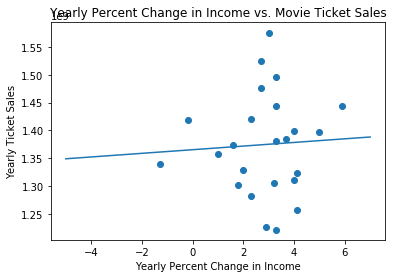

In [254]:
model = LinearRegression().fit(data[[incomelabel]], data[ticketslabel])

score = model.coef_[0]
intercept=model.intercept_
x = np.linspace(-5,7,100)
y = score*x+intercept
plt.plot(x,y)

plt.scatter(data[[incomelabel]], data[ticketslabel])
plt.ylabel("Yearly Ticket Sales")
plt.xlabel("Yearly Percent Change in Income")
plt.title("Yearly Percent Change in Income vs. Movie Ticket Sales")
plt.show()

The scatterplot shows: 
* `Total Tickets` has a large variation when `% Income Annual Change, Chained Dollars` is approximately 3%
* The slope of the line is a almost flat

Therefore, it is unlikely that there is a relationship. 

#### Finding r

In [255]:
r= np.corrcoef(data[incomelabel], data[ticketslabel])[0][1]
print("R Value of Correlation: ", r)

R Value of Correlation:  0.05553916140347339


This low r-value indicates that `% Income Annual Change, Chained Dollars` does not linearly correlate with `Total Tickets`.

### Determining a Non-Linear Relationship

In [256]:
spearman = spearmanr(data[incomelabel], data[ticketslabel])
print('Correlation: {:.3f}'.format(spearman.correlation))
print('P-Value: {:.3f}'.format(spearman.pvalue))

Correlation: 0.027
P-Value: 0.900


From the low correlation and high p-value, we can likely say that `% Income Annual Change, Chained Dollars` and `Total Tickets` do not demonstrate a non-linear relationship.
## Conclusion
### Findings
Based on our analysis above, the performance of the economy shows no relationship to the number of tickets sold. Therefore, the economy is not a key driver in selling movie tickets. 

### Application
With additional research, this data could have numerous applications. For example, this data concludes that box-office industries are a potential safe haven for investment, which means that investors and asset managers could invest accordingly when there are indications of an economic downturn. 

From a box-office industry standpoint, this data is helpful because it shows that optimistically, companies can perform well during economic decline, and pessimistically, that companies can perform poorly during a standard fiscal year. Consumers will be turning to box-office movies independent of their economic disposition, so income is not the key driver of box-office movies.

### Next Steps
Now that we know that `Tickets Sold` is independent of the economy, it raises the following questions:
* What are some key drivers of tickets sold?
* If the wealth of a nation does not impact the number of tickets sold, how elastic is demand for movie tickets?

This type of research will complement the research because it will provide a wider context for the data. For example, in the applications stated above, an investor would need to look at not only an economic downturn, but also whether key indicators are high. Additionally, elasticity will allow a company to figure out whether changing ticket prices will increase company profitability.

# How does the economy impact the market share that a genre captures?
Although the economy does not correlate to the number of tickets sold, there is a possibility that it correlates to the type of genre that is popular. To determine this, we will be using `GDP % Growth` and`% Income Annual Change, Chained Dollars` as economic indicators to measure the state of the economy and comparing it to the market share of each genre.

**Hypothesis:** Change in `GDP % Growth` / `% Income Annual Change, Chained Dollars` will change market share for each genre.

This makes sense because movies are a form of escape and express people's emotions. Therefore, it would make sense if they are related. For example, maybe people love horror when the economy is pessimistically performing, or turn to comedy as a form of escape.

**Null Hypothesis:** Change in `GDP % Growth` / `% Income Annual Change, Chained Dollars` will *not* change market share for each genre.

## How does the percent change in GDP impact the market share that each genre captures?

First, we will be using percentage change in GDP as a measure of the health of the U.S. economy and identifying whether it impacts the market share of each genre.
### Identifying Whether a Linear Relationship Exists
#### Applying a Linear Model

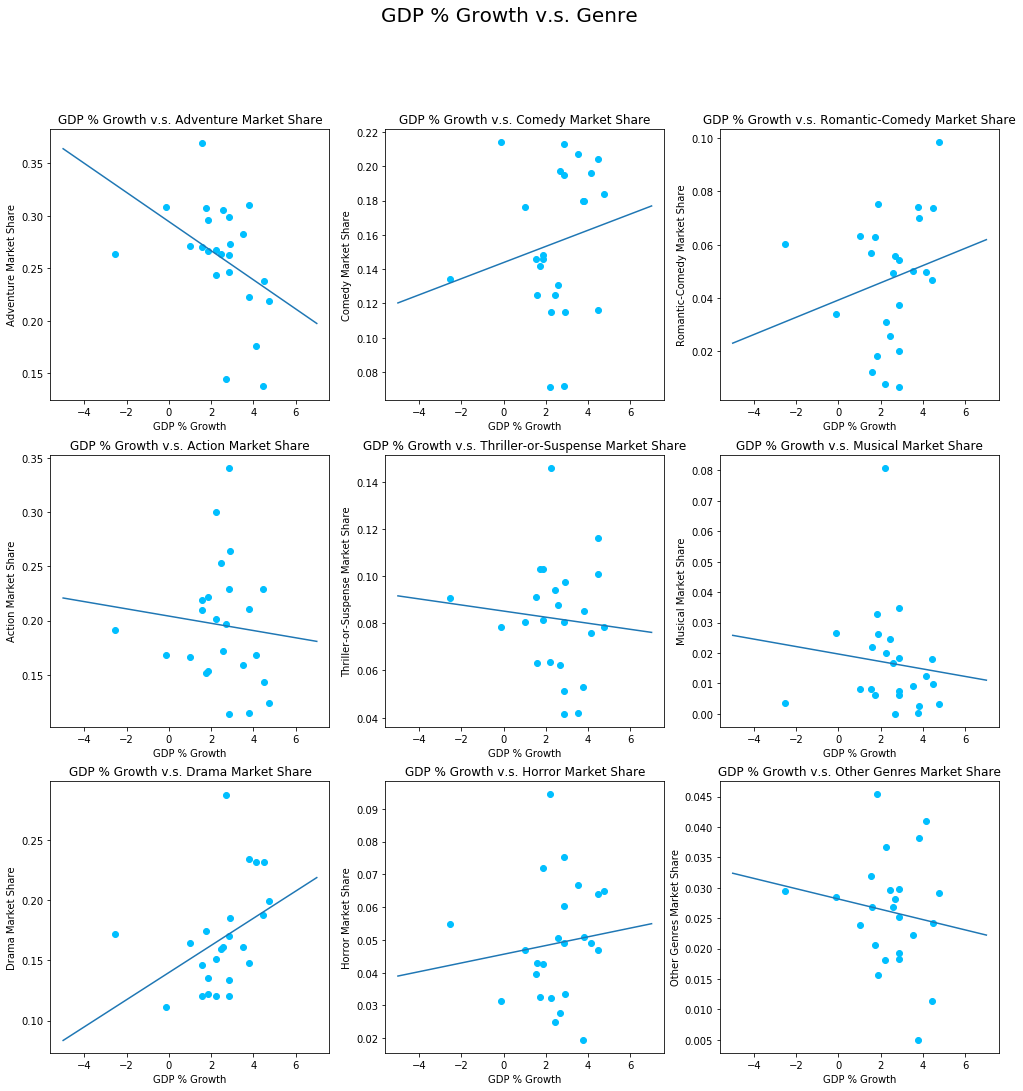

In [257]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('GDP % Growth v.s. Genre', fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[gdplabel]], data[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(data[gdplabel], data[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title('GDP % Growth v.s. ' + c)
    axs[xaxs, yaxs].set_xlabel('GDP % Growth')
    axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()


From the visuals above, we can see the following:
* `Action`, `Thriller-or-Suspense`, `Musical`, `Horror`, and `Other` all show relatively flat lines, indicating a likely lack of correlation
* `Adventure`, `Comedy`, `Romantic Comedy`, and `Drama` have steep lines, so correlation is possible
* Additionally, genres with a steeper line show a more horizontal scatter, while genres with flatter lines show a vertical scatter

#### Finding r

In [258]:
relationship=[]
for c in col:
    cor = np.corrcoef(data[gdplabel],data[c])[0][1]
    if abs(cor)>.3:
        relationship.append(c)
        print(c,':', cor)

Adventure Market Share : -0.41792027342504723
Drama Market Share : 0.4085160610738337


Since only Adventure and Drama have a coefficient of determination with an absolute value greater than .3, we can conclude that there exists a moderate linear relationship between `GDP % Growth` and the market share of Adventure and Drama. 
#### Testing Randomness

In [259]:
def _permuted_y(c):
    ''' 
    This helper function takes data and permutates it and returns a copy.
    
    c: a slice of a pandas dataframe (i.e.: data['Action Market Share'])
    
    returns: a permutated copy of the data as a dataframe
    '''
    return np.random.permutation(c.copy())

def findtheslope(x,y):
    ''' 
    This function takes two variables, permutates the y-variable, applies the variable to a 
    Linear Model, and returns the correlation coefficient.
    
    x: the variable that will not be permutated, a slice of a pandas dataframe 
        (i.e.: data['Action Market Share'])
    y: the variable that will be permutateda slice of a pandas dataframe 
        (i.e.: data['Action Market Share'])
        
    returns: the correlation coefficient, int
    '''
    #creates a dataframe with a permutated y and returns the slope 
    #purpose: ensure that ny, ndf, and nmodel are local variable that can be rewritten with each function call
    ny=_permuted_y(y)
    ndf=pd.DataFrame({'ny':ny})
    nmodel=LinearRegression().fit(x,ndf[['ny']])
    return nmodel.coef_[0][0]

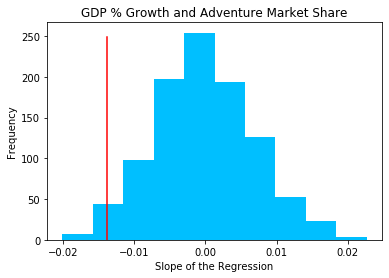

Percentage of Random Slopes Greater than Actual Slope:  0.022


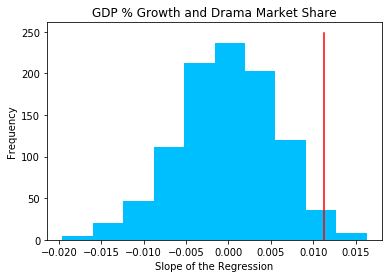

Percentage of Random Slopes Greater than Actual Slope:  0.043


In [260]:
xaxs = 0
yaxs = 0
trials=1000
total=0

for c in relationship:  
    #Plotting the actual slope 
    model = LinearRegression().fit(data[[gdplabel]], data[c])
    score= model.coef_[0]
    y = list(range(0, 250))
    x = np.full((1,250),score)[0]
    plt.plot(x, y, 'r')
    
    newarray = np.zeros(trials)
    for i in range(len(newarray)):
        newslope=findtheslope(data[[gdplabel]],data[c])
        newarray[i]=newslope
        if (score < 0 and newslope < score) or (score > 0 and newslope > score):
            total+= 1
    
    plt.hist(newarray, color = 'deepskyblue')
    plt.title(gdplabel+' and ' + c)
    plt.xlabel('Slope of the Regression')
    plt.ylabel('Frequency')
    plt.show()
    print('Percentage of Random Slopes Greater than Actual Slope: ' , total/1000)

Through the analysis above, we see that less than 5% of slopes due to chance lay farther out than the actual slope. This indicates that the relationship we found is not due to chance.
### Determining a Non-Linear Relationship
From the previous analysis, we found that a moderate linear relationship exists between `GDP % Growth` and `Adventure Market Share` as well as `GDP % Growth` and `Drama Market Share`.

Since the linear relationship is moderate between GDP and the two genres and non-existent with the other genres, we can attempt to see if a non-linear model better fits the data.

In [261]:
for c in col:
    sp = spearmanr(data[gdplabel],data[c])
    if abs(sp.correlation)>.3:
        print(c[:c.find(' ')])
        print('r: {:.4f}'.format(sp.correlation), 'p-value: {:.4f}'.format(sp.pvalue))

Adventure
r: -0.4905 p-value: 0.0149
Drama
r: 0.5224 p-value: 0.0088


We can see from the analysis above that none of the genres besides Adventure or Drama demonstrate a non-linear relationship, and that the p-value of both are less than 2%, showing the validity of the relationship.

We can also see that the strength of r increases only slightly when we use a rank-correlation but not significantly. Between the scatter plot, coefficient of determination, and rank correlation, we can therefore say that a moderate linear relationship exists.

## How does annual change in income percent change impact the market share that each genre captures?
In this portion of the analysis, we will be taking a look at whether income of consumers more directly impacts the market share a genre captures.

### Identifying Whether a Linear Relationship Exists
#### Applying a Linear Model

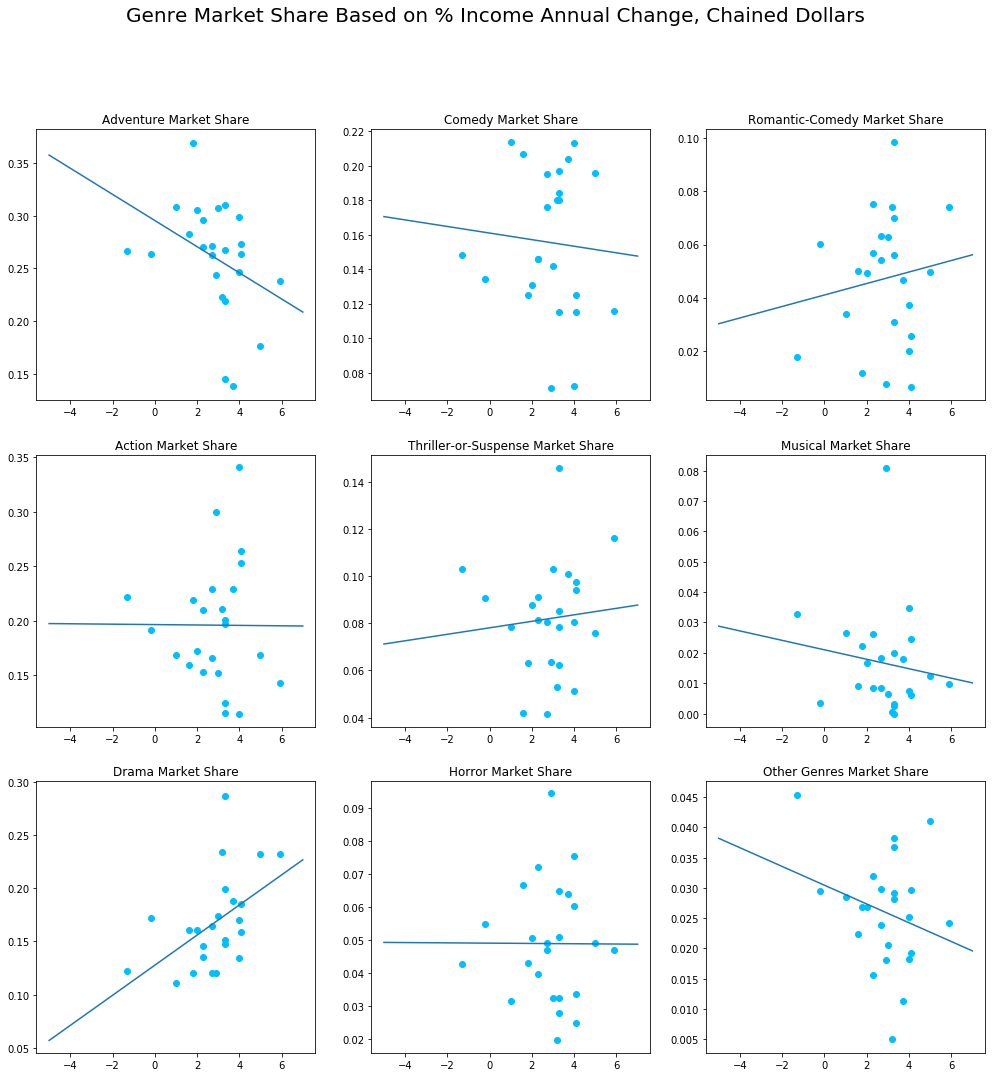

In [262]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + incomelabel, fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[incomelabel]], data[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(data[incomelabel], data[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(incomelabel)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()


From the graphs above, we can see that:
* Many of the genres do not have a relationship with income and are relatively flat
* Drama, Adventure, and Other, however, do demonstrate a potential linear correlation

#### Finding r

In [263]:
relationship=[]
for c in col:
    cor = np.corrcoef(data[incomelabel],data[c])[0][1]
    if abs(cor)>.3:
        relationship.append(c)
        print(c,':', cor)

Adventure Market Share : -0.36537483796814235
Drama Market Share : 0.49976989083829354


By filtering out any genre with a coefficient of determination of less than 0.3, we can conclude that only Adventure and Drama show a relationship with income.

#### Testing Randomness

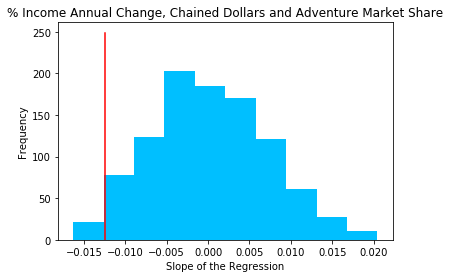

Percentage of Random Slopes Greater than Actual Slope:  0.027


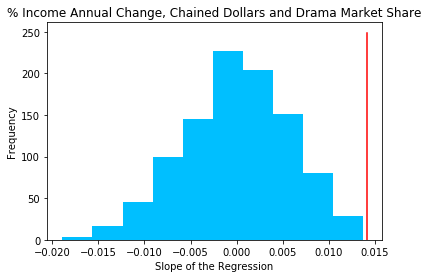

Percentage of Random Slopes Greater than Actual Slope:  0.027


In [264]:
xaxs = 0
yaxs = 0
trials=1000
total=0

for c in relationship:  
    #Plotting the actual slope 
    model = LinearRegression().fit(data[[incomelabel]], data[c])
    score= model.coef_[0]
    y = list(range(0, 250))
    x = np.full((1,250),score)[0]
    plt.plot(x, y, 'r')
    
    newarray = np.zeros(trials)
    for i in range(len(newarray)):
        newslope=findtheslope(data[[incomelabel]],data[c])
        newarray[i]=newslope
        if (score < 0 and newslope < score) or (score > 0 and newslope > score):
            total+= 1
    
    plt.hist(newarray, color = 'deepskyblue')
    plt.title(incomelabel+' and ' + c)
    plt.xlabel('Slope of the Regression')
    plt.ylabel('Frequency')
    plt.show()
    print('Percentage of Random Slopes Greater than Actual Slope: ' , total/1000)

After running 1000 trials, we can see that less than 3% of random slopes fall above the actual slope. Therefore, the relationship is not due to chance.
### Determining a Non-Linear Relationship
From the previous analysis, we found that a moderate linear relationship exists between `% Income Annual Change, Chained Dollars` and `Adventure Market Share` as well as `% Income Annual Change, Chained Dollars` and `Drama Market Share`.

Now we can take a look at whether a non-linear relationship fits the data better.

In [265]:
for c in col:
    sp = spearmanr(data[incomelabel],data[c])
    if abs(sp.correlation)>.3:
        print(c[:c.find(' ')])
        print('r: {:.4f}'.format(sp.correlation), 'p-value: {:.4f}'.format(sp.pvalue))

Adventure
r: -0.4386 p-value: 0.0320
Drama
r: 0.5258 p-value: 0.0083


The Spearman r is approximately 0.07 better than the coefficient of determination for Adventure, so the relationship between `% Income Annual Change, Chained Dollars` and `Adventure Market Share` is likely non-linear. 

The r for Drama increases only slightly when we use a rank-correlation. Between the scatter plot, coefficient of determination, and rank correlation, we can say that a moderate linear relationship exists between `% Income Annual Change, Chained Dollars` and `Drama Market Share`.

## Conclusion
### Findings
Based on our analysis above, we found that as the economy improves, Drama market share increases and Adventure market share decreases. This relationship is moderate, indicating that there are other factors that drive the market share of these two genres.
### Application
This data is relevant because movie preference is a reflection of consumer mindset. 

As the economy performs poorly, people want to watch underdogs win, and Adventure movies deliver that message through courageous protagonists defeating evil adversaries (https://penandthepad.com/characteristics-adventure-fiction-6820162.html). These movies communicate the American spirit that hardwork and determination pay off.

Drama movies portray a spectrum of ethical issues and look and issues beyond simply good or evil (https://www.filmsite.org/dramafilms.html). Such movies become more popular when the economy is performing well because when people can meet basic hygiene needs, they can shift their focus to bettering the world around them.

This shift in consumer mindset is relevant beyond box-office movies and can apply to the media industry in general. When people are not doing well, they want hope, and when people are doing well, they want to help others. Therefore, music, comics, and television shows can capitalize on this trend.

### Next Steps
Some other questions this data prompts are as follows:
* Does this trend translate to other types of media?
* What other factors drive consumer genre preference?

This type of research will complement provide further insight into the consumer psyche and allow movie companies to refine movie production to target consumer needs.